06.26 활용 데이터셋 https://universe.roboflow.com/dsstudy-h0rzy/food-ingredients-image-detection_team4

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16680, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 16680 (delta 101), reused 129 (delta 63), pack-reused 16459
Receiving objects: 100% (16680/16680), 15.33 MiB | 31.39 MiB/s, done.
Resolving deltas: 100% (11407/11407), done.


In [2]:
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 932.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import torch
import yaml
from IPython.display import Image, clear_output  # to display images
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.0+cu121 (NVIDIA A100-SXM4-40GB)


In [5]:
data_dir = '/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626'
data_yaml = '/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626/data.yaml'

In [6]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['-',
  '10_pineapple',
  '10_tangerine',
  'Apple',
  'Bagel',
  'Banana',
  'Bitter melon',
  'Cucumber',
  'Garlic',
  'Green Chili',
  'Lady finger',
  'Mushroom',
  'Onion',
  'Orange',
  'Potato',
  'Sponge Gourd',
  'Tomato',
  'ampalaya',
  'apple',
  'asparagus',
  'avocado',
  'bacon',
  'banana',
  'beef',
  'bell pepper',
  'bell_pepper',
  'bento',
  'bitter gourd',
  'blueberries',
  'bok choy',
  'bottle',
  'bread',
  'broccoli',
  'butter',
  'cabbage',
  'can',
  'canned_tuna',
  'carrot',
  'cashew',
  'cauliflower',
  'cheese',
  'cherry',
  'chicken',
  'chicken breast',
  'chicken thigh',
  'chicken wing',
  'chicken_breast',
  'chilli',
  'chocolate',
  'corn',
  'crab',
  'cream-cheese',
  'cucumber',
  'dates',
  'egg',
  'egg_',
  'eggplant',
  'eggs',
  'fish',
  'fish_cake',
  'flour',
  'french_fries',
  'garlic',
  'ginger',
  'goat_cheese',
  'grapefruit',
  'grapes',
  'grated_cheese',
  'green chilli',
  'green-chillies',
  'green_beans',
  'g

In [10]:
drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0626/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=drive_best_model_path)
print(model)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-28 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7449736 parameters, 0 gradients, 17.1 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [12]:
!python train.py --img 640 --batch 16 --epochs 50 --data {data_yaml} --weights {drive_best_model_path} --cache

2024-06-28 06:14:17.914866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 06:14:17.914915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 06:14:17.916529: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/니꺼내꺼/checkpoints/0626/best.pt, cfg=, data=/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=No

In [14]:
!ls /content/yolov5/runs/train/exp2/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1719555260.2694be974d79.9814.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


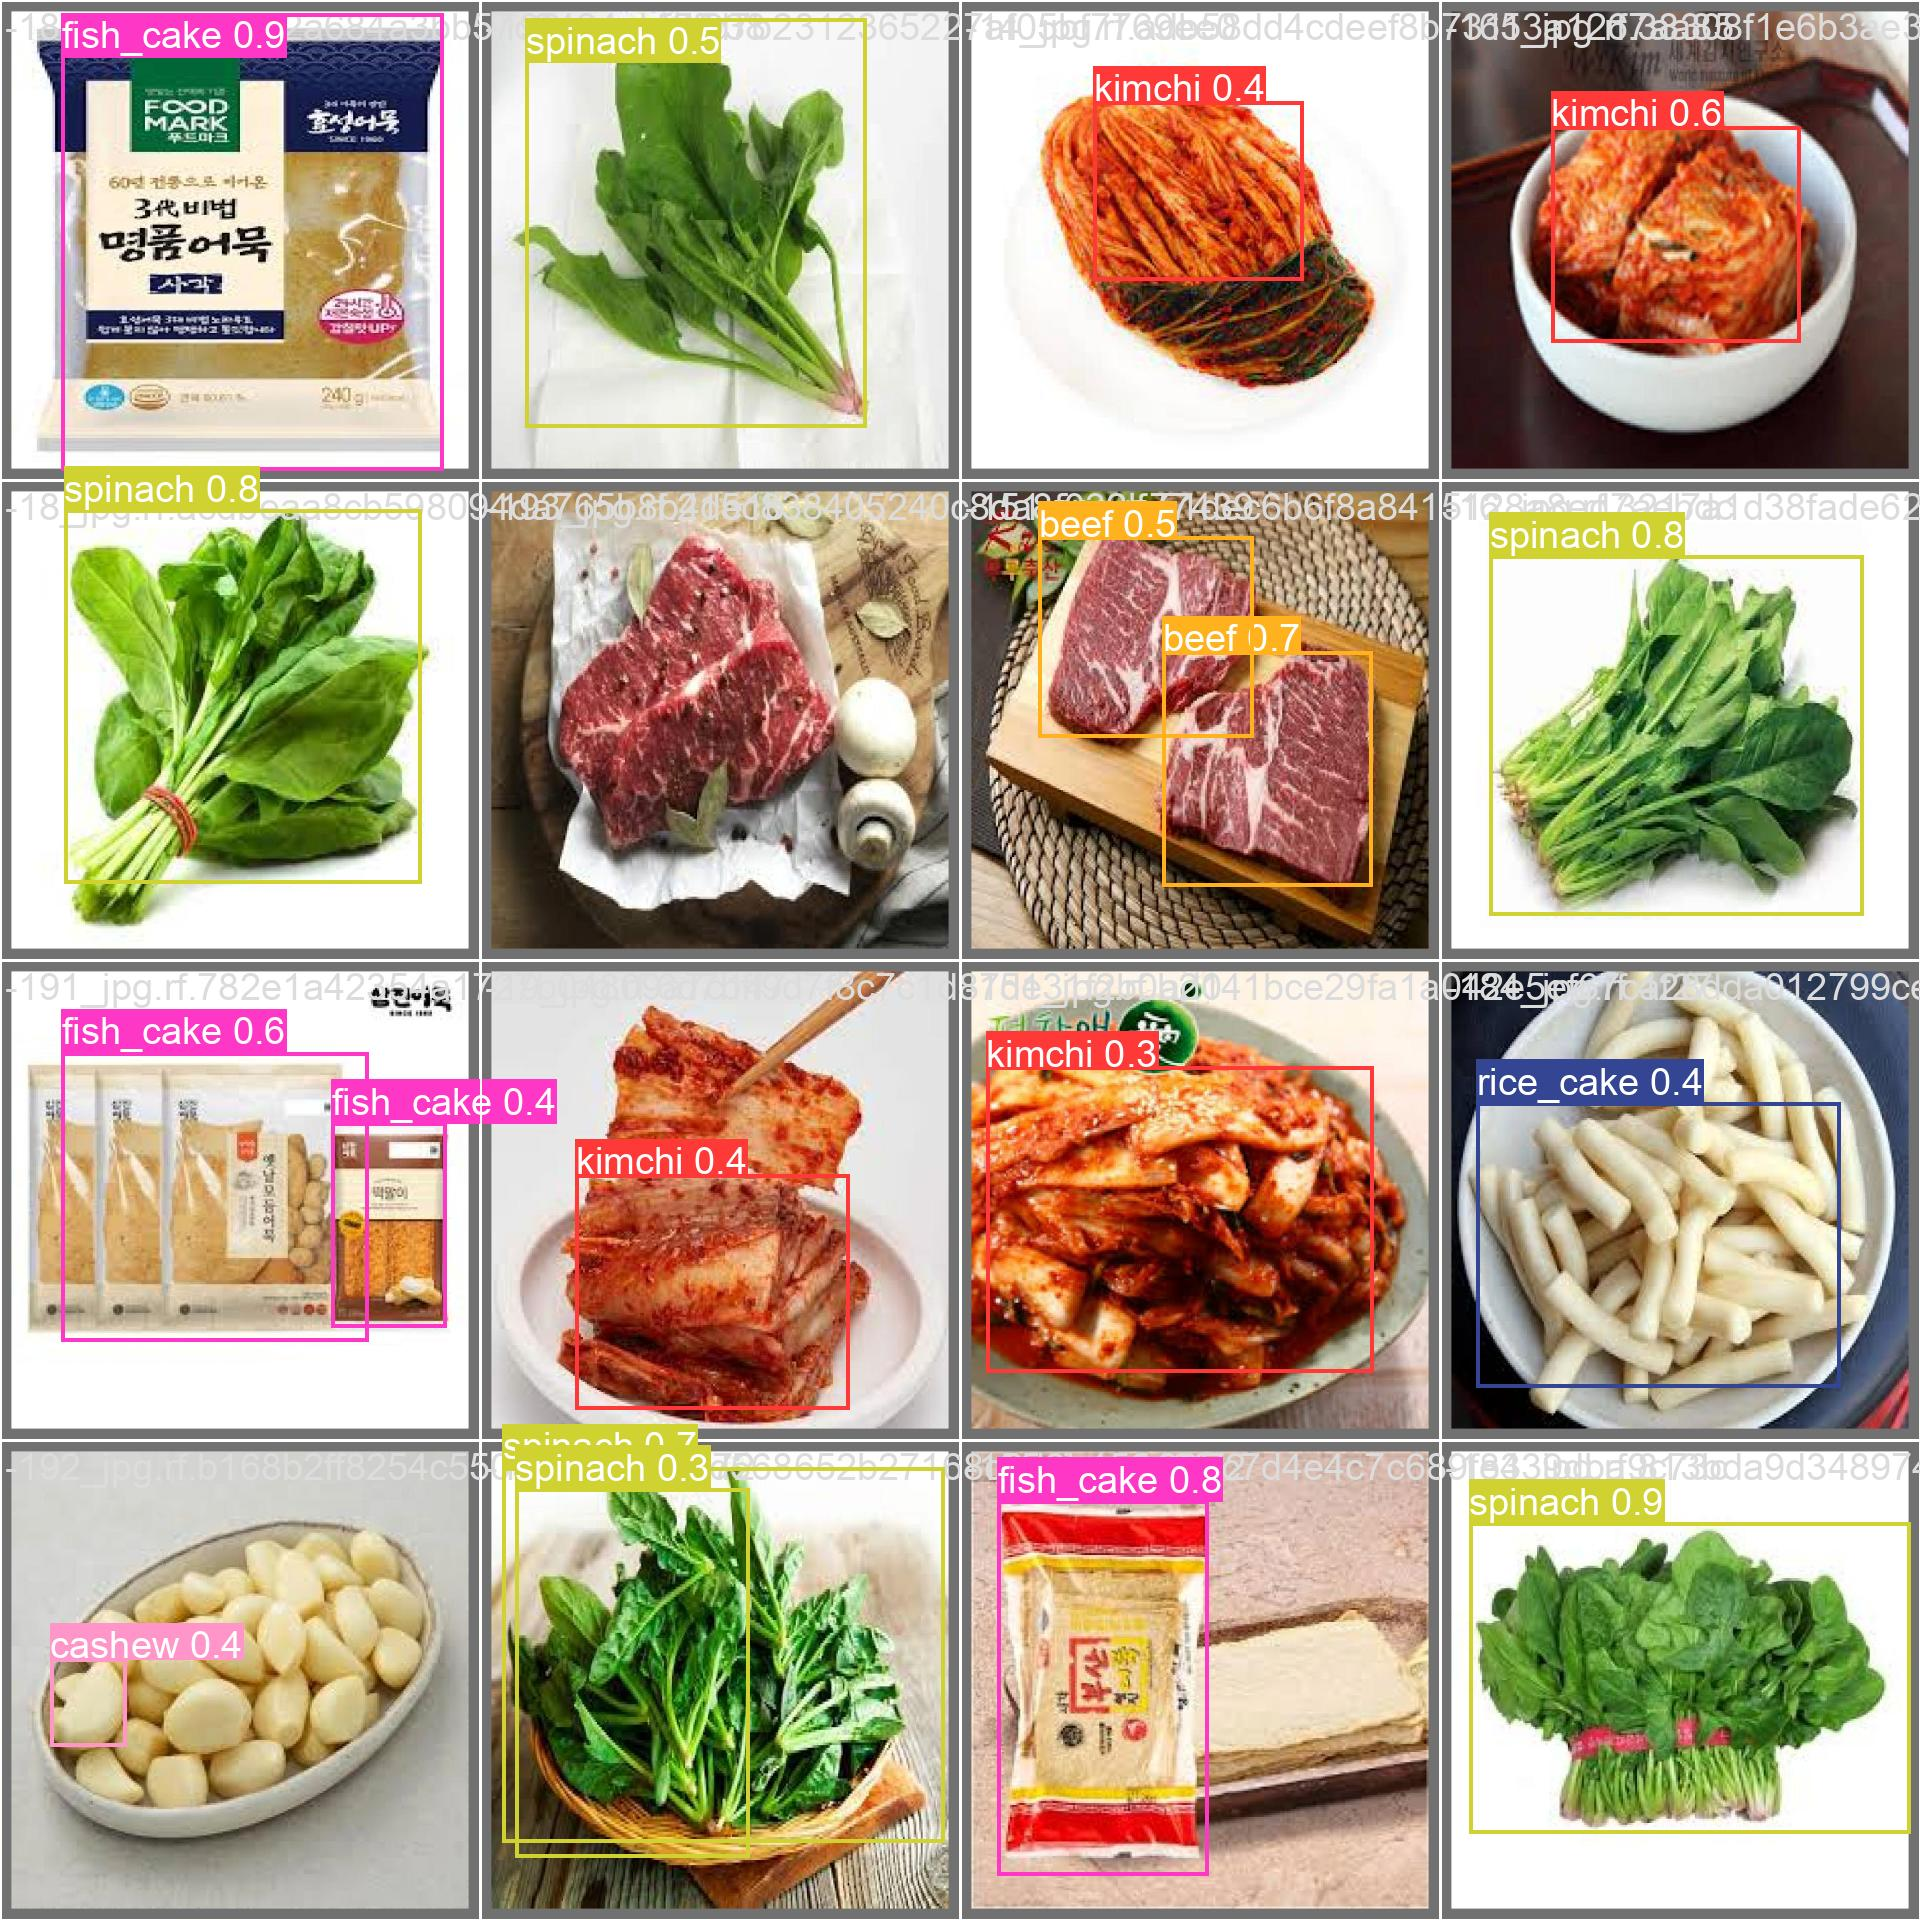

In [17]:
from IPython.display import Image, display
image_path = '/content/yolov5/runs/train/exp2/val_batch1_pred.jpg'
display(Image(filename=image_path))

In [18]:
import shutil

best_model_path = '/content/yolov5/runs/train/exp2/weights/best.pt'
last_model_path = '/content/yolov5/runs/train/exp2/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
drive_last_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt
Last model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt


In [19]:
import torch
drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=drive_best_model_path)
print(model)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-28 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7449736 parameters, 0 gradients, 17.1 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [23]:
drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
!python train.py --img 640 --batch 32 --epochs 50 --data {data_yaml} --weights {drive_best_model_path} --cache

2024-06-28 07:11:40.968483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 07:11:40.968529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 07:11:40.970124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt, cfg=, data=/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=No

In [4]:
import yaml
data_yaml = '/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626/data.yaml'
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['-',
  '10_pineapple',
  '10_tangerine',
  'Apple',
  'Bagel',
  'Banana',
  'Bitter melon',
  'Cucumber',
  'Garlic',
  'Green Chili',
  'Lady finger',
  'Mushroom',
  'Onion',
  'Orange',
  'Potato',
  'Sponge Gourd',
  'Tomato',
  'ampalaya',
  'apple',
  'asparagus',
  'avocado',
  'bacon',
  'banana',
  'beef',
  'bell pepper',
  'bell_pepper',
  'bento',
  'bitter gourd',
  'blueberries',
  'bok choy',
  'bottle',
  'bread',
  'broccoli',
  'butter',
  'cabbage',
  'can',
  'canned_tuna',
  'carrot',
  'cashew',
  'cauliflower',
  'cheese',
  'cherry',
  'chicken',
  'chicken breast',
  'chicken thigh',
  'chicken wing',
  'chicken_breast',
  'chilli',
  'chocolate',
  'corn',
  'crab',
  'cream-cheese',
  'cucumber',
  'dates',
  'egg',
  'egg_',
  'eggplant',
  'eggs',
  'fish',
  'fish_cake',
  'flour',
  'french_fries',
  'garlic',
  'ginger',
  'goat_cheese',
  'grapefruit',
  'grapes',
  'grated_cheese',
  'green chilli',
  'green-chillies',
  'green_beans',
  'g

In [10]:
!ls /content/yolov5/runs/train/exp4

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1719558703.2694be974d79.24643.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


In [12]:
import os,shutil

best_model_path = '/content/yolov5/runs/train/exp4/weights/best.pt'
last_model_path = '/content/yolov5/runs/train/exp4/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
drive_last_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt
Last model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt


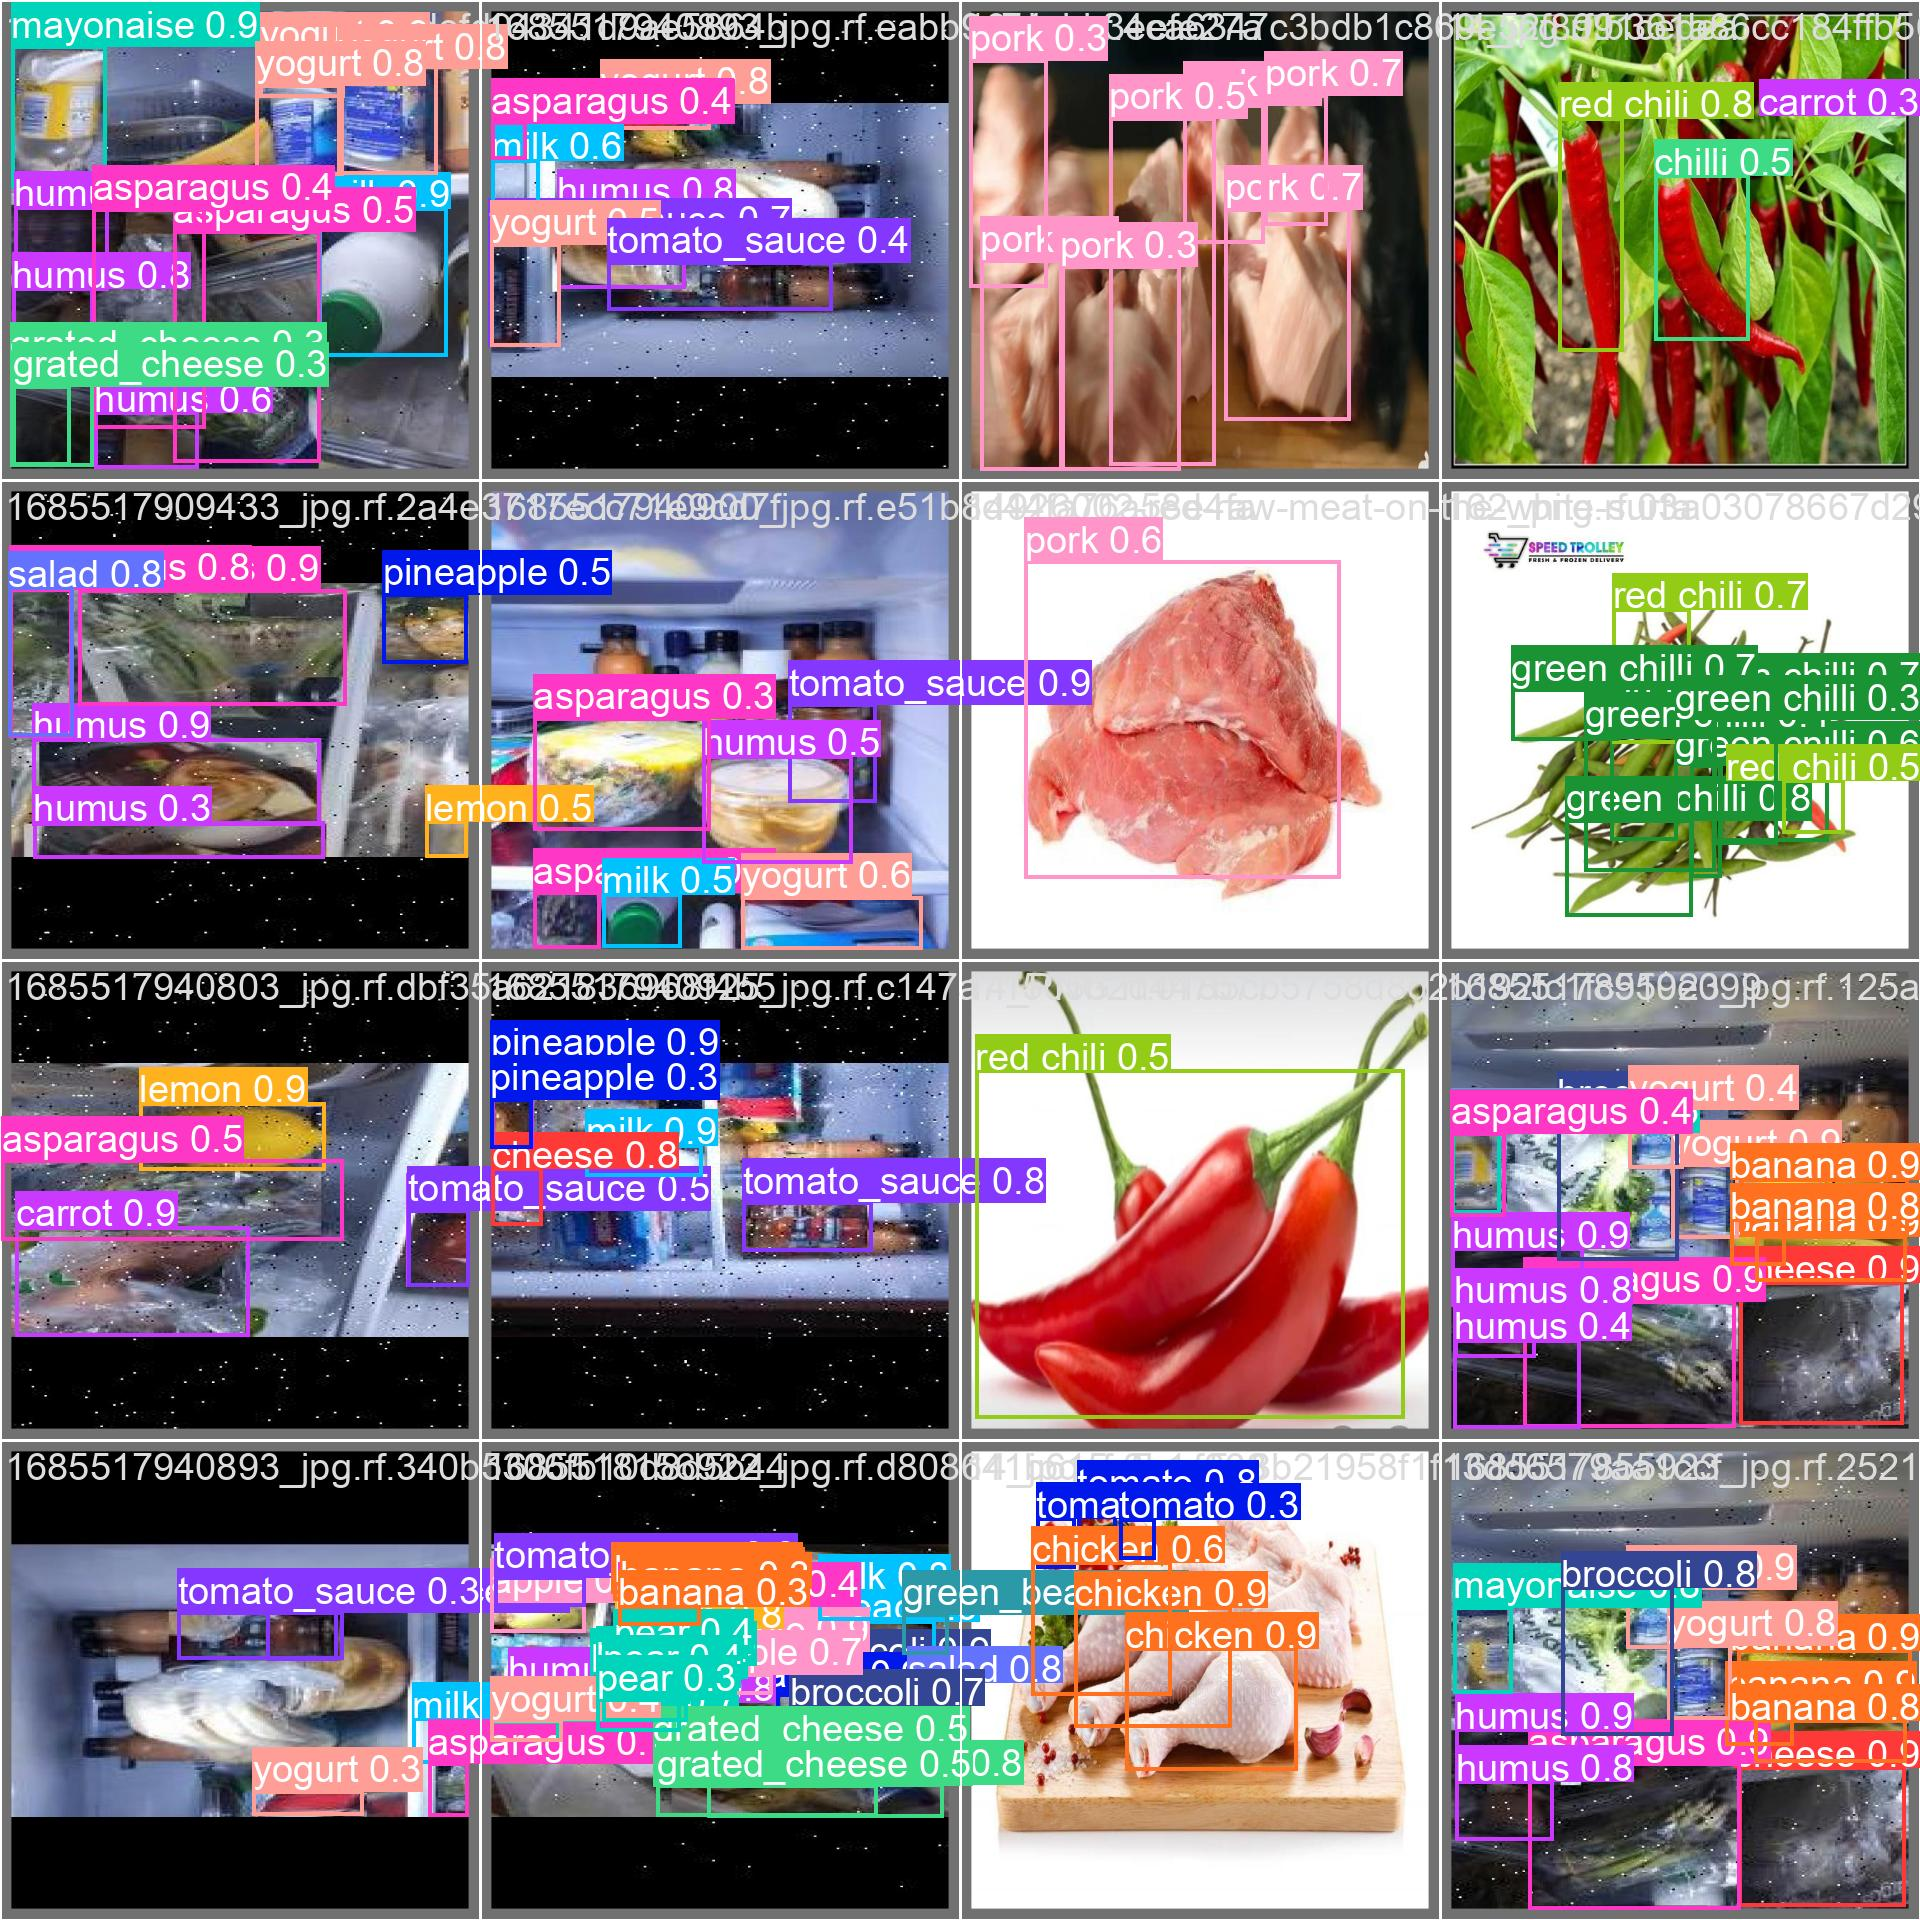

In [19]:
from IPython.display import Image, display
image_path = '/content/yolov5/runs/train/exp4/val_batch2_pred.jpg'
display(Image(filename=image_path))

In [28]:
drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
!python train.py --img 640 --batch 32 --epochs 50 --data {data_yaml} --weights {drive_best_model_path} --cache

2024-06-28 08:33:36.280431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 08:33:36.280483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 08:33:36.281777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt, cfg=, data=/content/drive/MyDrive/니꺼내꺼/Data_Food_Ingredients_0626/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=No

In [31]:
import os,shutil

best_model_path = '/content/yolov5/runs/train/exp6/weights/best.pt'
last_model_path = '/content/yolov5/runs/train/exp6/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt'
drive_last_model_path = '/content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/best.pt
Last model saved to /content/drive/MyDrive/니꺼내꺼/checkpoints/0628/last.pt


/content


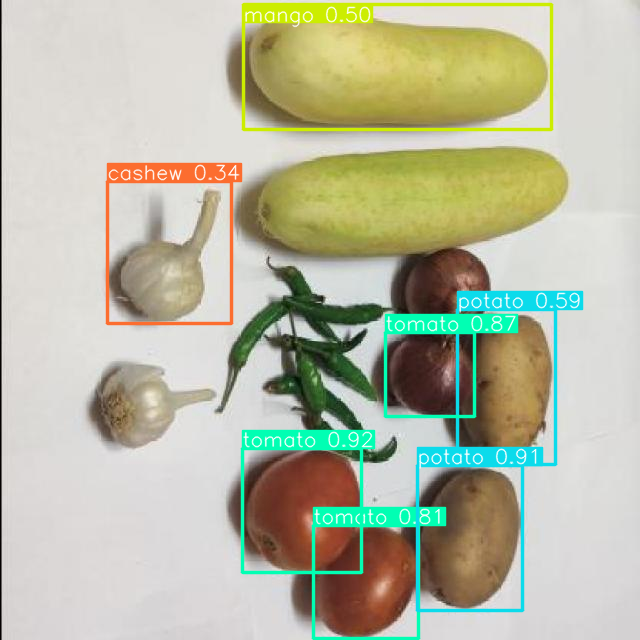

In [35]:
%cd ../
img_path = 'drive/MyDrive/니꺼내꺼/tmp.jpg'
results = model(img_path)

results.show()  # 결과 이미지 시각화